                              THE ANALYSIS OF COVID DATA USING JUPYTER NOTEBOOK

In [1]:
# GETTING THE DATA FROM THE FOLDER
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

covid_df=pd.read_csv("owid-covid-data.csv")
covid_df.head(6)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [2]:
# lets look at the data we are working with 
covid_df.shape

(203338, 67)

In [3]:
nigeria_data=covid_df[(covid_df["continent"]=='Africa') & (covid_df["location"]=='Nigeria')].reset_index()

print(nigeria_data.shape)
nigeria_data.head()

(877, 68)


,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,132983,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
1,132984,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,NaN,NaN,NaN,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
2,132985,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,NaN,NaN,NaN,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
3,132986,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,NaN,NaN,NaN,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
4,132987,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,NaN,NaN,NaN,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN


In [4]:
# to get the number null in the nigerian data 
nigeria_data.isna().count()

index                                      877
iso_code                                   877
continent                                  877
location                                   877
date                                       877
                                          ... 
human_development_index                    877
excess_mortality_cumulative_absolute       877
excess_mortality_cumulative                877
excess_mortality                           877
excess_mortality_cumulative_per_million    877
Length: 68, dtype: int64

In [5]:
nigeria_data.describe()

,index,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,877.000000,877.000000,876.000000,871.000000,853.000000,851.000000,846.000000,877.000000,876.000000,871.000000,...,8.770000e+02,877.0,877.000,0.0,8.770000e+02,8.770000e+02,0.0,0.0,0.0,0.0
mean,133421.000000,145416.556442,297.224886,297.986055,1969.499414,3.703878,3.720894,681.422949,1.392793,1.396364,...,6.000000e-01,10.8,41.949,NaN,5.469000e+01,5.390000e-01,NaN,NaN,NaN,NaN
std,253.312389,89671.299227,430.153749,363.936782,1009.207423,6.449202,4.474921,420.200302,2.015686,1.705410,...,2.221713e-16,0.0,0.000,NaN,7.109482e-15,1.110857e-16,NaN,NaN,NaN,NaN
min,132983.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.005000,0.000000,0.000000,...,6.000000e-01,10.8,41.949,NaN,5.469000e+01,5.390000e-01,NaN,NaN,NaN,NaN
25%,133202.000000,59345.000000,34.750000,43.286000,1127.000000,0.000000,0.286000,278.091000,0.162750,0.203000,...,6.000000e-01,10.8,41.949,NaN,5.469000e+01,5.390000e-01,NaN,NaN,NaN,NaN
50%,133421.000000,165515.000000,140.000000,154.571000,2067.000000,1.000000,1.714000,775.604000,0.656000,0.724000,...,6.000000e-01,10.8,41.949,NaN,5.469000e+01,5.390000e-01,NaN,NaN,NaN,NaN
75%,133640.000000,221071.000000,422.250000,437.000000,2991.000000,5.000000,6.535500,1035.940000,1.978250,2.047500,...,6.000000e-01,10.8,41.949,NaN,5.469000e+01,5.390000e-01,NaN,NaN,NaN,NaN
max,133859.000000,260339.000000,6158.000000,2011.143000,3148.000000,93.000000,27.429000,1219.950000,28.856000,9.424000,...,6.000000e-01,10.8,41.949,NaN,5.469000e+01,5.390000e-01,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'The chart of daily cases covid19 in Nigeria'}, xlabel='date,total_cases'>

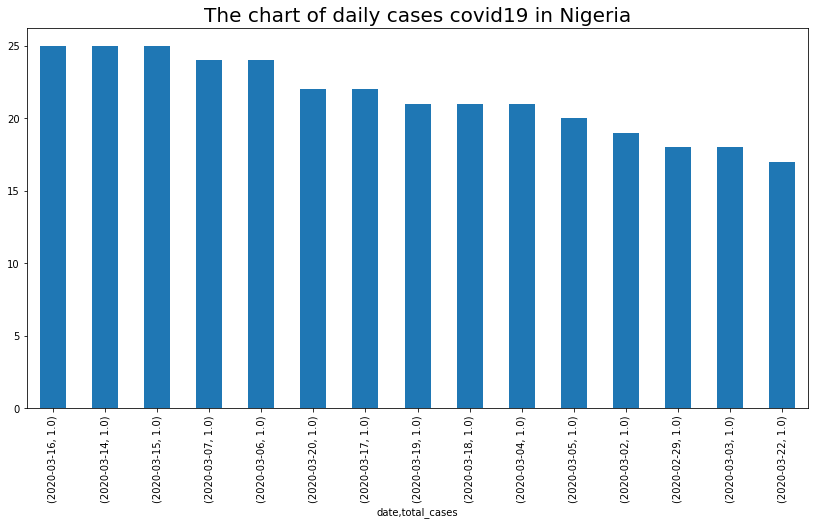

In [6]:
# The bar chart of top 15 daily cases 
ng_total_case=covid_df.groupby("date")['total_cases'].value_counts().sort_values(ascending=False).head(15)
plt.xticks(rotation=90)
plt.title("The chart of daily cases covid19 in Nigeria", size=20)
ng_total_case.plot.bar(figsize=(14,7))

<AxesSubplot:xlabel='continent,new_cases'>

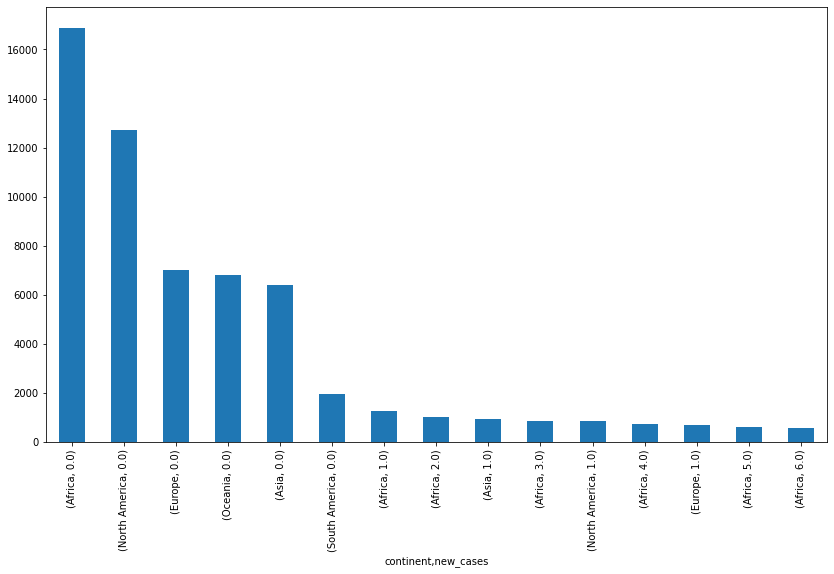

In [7]:
continent_cases=covid_df.groupby("continent")["new_cases"].value_counts().sort_values(ascending=False).head(15)
continent_cases.plot.bar(figsize=(14,8))

In [8]:
# looking the contient cases, they are joined together. I'll join each continent by names
asia=covid_df[(covid_df["continent"]=="Asia")].sum()
africa=covid_df[(covid_df["continent"]=="Africa")].sum()
europe=covid_df[(covid_df["continent"]=="Europe")].sum()
n_ameria=covid_df[(covid_df["continent"]=="North America")].sum()
s_ameria=covid_df[(covid_df["continent"]=="South America")].sum()
oceanic=covid_df[(covid_df["continent"]=="Oceania")].sum()
nan=covid_df[(covid_df["continent"]=="NaN")].sum()
# asia=asia.groupby('total_cases').count().sort_values(by="new_cases",ascending=False)



C:\Users\StarCJ\AppData\Local\Temp\ipykernel_884\192201374.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  asia=covid_df[(covid_df["continent"]=="Asia")].sum()
C:\Users\StarCJ\AppData\Local\Temp\ipykernel_884\192201374.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  africa=covid_df[(covid_df["continent"]=="Africa")].sum()
C:\Users\StarCJ\AppData\Local\Temp\ipykernel_884\192201374.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  europe=covid_df[(covid_df["continent"]=="Europe

In [9]:

# nan=covid_df["continent"].isnull()
# nan.describe()

In [10]:
# making a dictionary of the continent in the world 
continantal={
     'cases':["Total Cases", 'New Cases'],
     'asia':[asia['total_cases'],asia['new_cases']],
     'africa':[africa['total_cases'],africa['new_cases']],
     'europe':[europe['total_cases'],africa['new_cases']],
     'nan':[nan['total_cases'],nan['new_cases']],
     'n_ameria':[n_ameria['total_cases'],n_ameria['new_cases']],
     's_ameria':[s_ameria['total_cases'],s_ameria['new_cases']],
     'oceanic':[oceanic['total_cases'],oceanic['new_cases']]
}

In [11]:
content=pd.DataFrame(continantal)
content

,cases,asia,africa,europe,nan,n_ameria,s_ameria,oceanic
0,Total Cases,4.909275e+10,4.857309e+09,5.558274e+10,0.0,3.693501e+10,2.349835e+10,1.309133e+09
1,New Cases,1.615609e+08,1.220147e+07,1.220147e+07,0.0,1.071927e+08,6.147293e+07,1.102732e+07


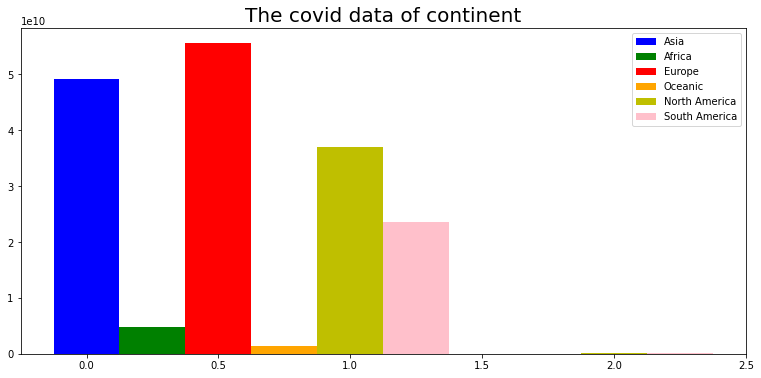

In [12]:
# To open the dictionary to be able to read and use it 
from cProfile import label
from turtle import pos, width

from matplotlib.pyplot import figure


# pos=list(range(len(content['asia'])))
# width=0.25
# fig,ax=plt.subplot(figsize=(8,6))
figure(figsize=(13,6))
plt.title("The covid data of continent",size=20)
# plt.bar(pos,content['asia'],width,alpha=0.5,color='g')
x=np.arange(2)
bar1=plt.bar(x+0.00,content["asia"],color='b',width=0.25)
bar2=plt.bar(x+0.25,content["africa"],color='g',width=0.25)
bar3=plt.bar(x+0.50,content["europe"],color='r',width=0.25)
bar4=plt.bar(x+0.75,content["oceanic"],color='orange',width=0.25)
bar5=plt.bar(x+1.00,content["n_ameria"],color='y',width=0.25)
bar6=plt.bar(x+1.25,content["s_ameria"],color='pink',width=0.25)

# plt.xticks(x+0.25,['Asia','Africa','Europe','Oceanic','North America','South America'])
plt.legend((bar1,bar2,bar3,bar4,bar5,bar6),('Asia','Africa','Europe','Oceanic','North America','South America'))
plt.show()
